In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data


In [21]:
y = iris.target
x


NameError: name 'x' is not defined

In [23]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [29]:
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]
print(y)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 

In [6]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)


In [8]:
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)


In [9]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


In [10]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

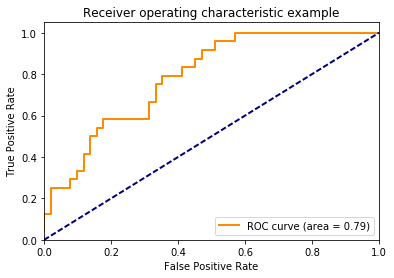

In [11]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [12]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [13]:
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [14]:
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])


In [15]:
mean_tpr /= n_classes


In [16]:
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])



In [17]:
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)



In [18]:
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

In [19]:
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

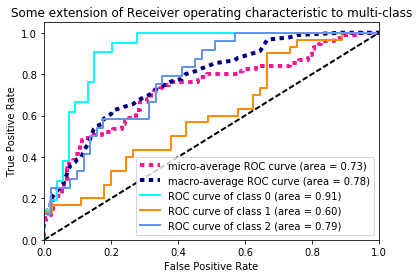

In [20]:
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


In [30]:
import os
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC


def make_Dictionary(root_dir):
    emails_dirs = [os.path.join(root_dir,f) for f in os.listdir(root_dir)]    
    all_words = []       
    for emails_dir in emails_dirs:
        dirs = [os.path.join(emails_dir,f) for f in os.listdir(emails_dir)]
        for d in dirs:
            emails = [os.path.join(d,f) for f in os.listdir(d)]
            for mail in emails:
                with open(mail) as m:
                    for line in m:
                        words = line.split()
                        all_words += words
    dictionary = Counter(all_words)
    list_to_remove = dictionary.keys()
    
    for item in list_to_remove:
        if item.isalpha() == False: 
            del dictionary[item]
        elif len(item) == 1:
            del dictionary[item]
    dictionary = dictionary.most_common(3000)
    
    np.save('dict_enron.npy',dictionary) 
    
    return dictionary
    
def extract_features(root_dir): 
    emails_dirs = [os.path.join(root_dir,f) for f in os.listdir(root_dir)]  
    docID = 0
    features_matrix = np.zeros((33716,3000))
    train_labels = np.zeros(33716)
    for emails_dir in emails_dirs:
        dirs = [os.path.join(emails_dir,f) for f in os.listdir(emails_dir)]
        for d in dirs:
            emails = [os.path.join(d,f) for f in os.listdir(d)]
            for mail in emails:
                with open(mail) as m:
                    all_words = []
                    for line in m:
                        words = line.split()
                        all_words += words
                    for word in all_words:
                      wordID = 0
                      for i,d in enumerate(dictionary):
                        if d[0] == word:
                          wordID = i
                          features_matrix[docID,wordID] = all_words.count(word)
                train_labels[docID] = int(mail.split(".")[-2] == 'spam')
                docID = docID + 1                
    return features_matrix,train_labels
    
#Create a dictionary of words with its frequency

root_dir = '/Users/vikaschhillar/Downloads/machine data'
dictionary = make_Dictionary(root_dir)


#Prepare feature vectors per training mail and its labels

features_matrix,labels = extract_features(root_dir)
np.save('enron_features_matrix.npy',features_matrix)
np.save('enron_labels.npy',labels)


#train_matrix = np.load('enron_features_matrix.npy');
#labels = np.load('enron_labels.npy');
print(features_matrix.shape)
print(labels.shape)
print(sum(labels==0),sum(labels==1))
X_train, X_test, y_train, y_test = train_test_split(features_matrix, labels, test_size=0.40)

## Training models and its variants

model1 = LinearSVC()
model2 = MultinomialNB()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)

result1 = model1.predict(X_test)
result2 = model2.predict(X_test)

print(confusion_matrix(y_test, result1))
print(confusion_matrix(y_test, result2))

NotADirectoryError: [Errno 20] Not a directory: '/Users/vikaschhillar/Downloads/machine data/.DS_Store'

(23592, 1000)
(23592,)
11580 12012


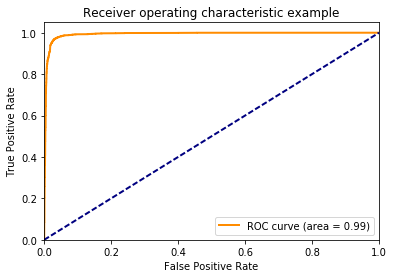

In [40]:
import os
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
import nltk
from nltk.corpus import stopwords


def make_Dictionary(root_dir):
    emails = [os.path.join(root_dir,f) for f in os.listdir(root_dir)]    
    all_words = []       
    for email in emails:
        with open(email, encoding='latin1') as m:
            content = m.read()
            all_words += nltk.word_tokenize(content)
    dictionary = [word for word in all_words if word not in stopwords.words('english')]
    dictionary = [word.lower() for word in dictionary if word.isalpha()]
    dictionary = Counter(dictionary)
    dictionary = dictionary.most_common(1000)
    return dictionary
    
def extract_features(test_dir): 
    docID = 0
    features_matrix = np.zeros((23592,1000))
    labels = np.zeros(23592)
    emails = [os.path.join(test_dir,f) for f in os.listdir(test_dir)]
    for mail in emails:
        with open(mail, encoding="latin1") as m:
            all_words = []
            for line in m:
                words = line.split()
                all_words += words
            for word in all_words:
                wordID = 0
                for i,d in enumerate(dictionary):
                    if d[0] == word:
                        wordID = i
                        features_matrix[docID,wordID] = all_words.count(word)
        labels[docID] = int(mail.split(".")[-2] == 'spam')
        docID = docID + 1                
    return features_matrix,labels
    
#Create a dictionary of words with its frequency

root_dir = '/Users/vikaschhillar/Downloads/iris-species/trainenron'
dictionary = make_Dictionary(root_dir)


#Prepare feature vectors per training mail and its labels

features_matrix,labels = extract_features(root_dir)

#train_matrix = np.load('enron_features_matrix.npy');
#labels = np.load('enron_labels.npy');
print(features_matrix.shape)
print(labels.shape)
print(sum(labels==0),sum(labels==1))
labels = label_binarize(labels, classes=[0, 1])
n_classes = labels.shape[1]
X_train, X_test, y_train, y_test = train_test_split(features_matrix, labels, test_size=0.40)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()